In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

Prepare Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras_preprocessing.image import ImageDataGenerator

In [5]:
data_path = pathlib.Path(r"/Users/kamonwantawong/Downloads/data")

In [6]:
all_images = list(data_path.glob(r'*/*.jpg')) + list(data_path.glob(r'*/*.jpeg')) + list(data_path.glob(r'*/*.png'))

images = []
labels = []

for item in all_images:
    path = os.path.normpath(item)
    splits = path.split(os.sep)
    if 'GT' not in splits[-2]:
        images.append(item)
        label = splits[-2]
        labels.append(label)

In [7]:
image_pathes = pd.Series(images).astype(str)
labels = pd.Series(labels)

dataframe =pd.concat([image_pathes, labels], axis=1)

dataframe.columns = ['images', 'labels']

dataframe.head()

,images,labels
0,/Users/kamonwantawong/Downloads/data/Rayong/Ra...,Rayong
1,/Users/kamonwantawong/Downloads/data/Rayong/25...,Rayong
2,/Users/kamonwantawong/Downloads/data/Rayong/ra...,Rayong
3,/Users/kamonwantawong/Downloads/data/Rayong/a0...,Rayong
4,/Users/kamonwantawong/Downloads/data/Rayong/wa...,Rayong


In [8]:
dataframe.groupby('labels').count()

,images
labels,
Amnat Charoen,21
Ang Thong,19
Bangkok,28
Bueng Kan,24
Buri Ram,23
...,...
Udon Thani,36
Uthai Thani,31
Uttaradit,28


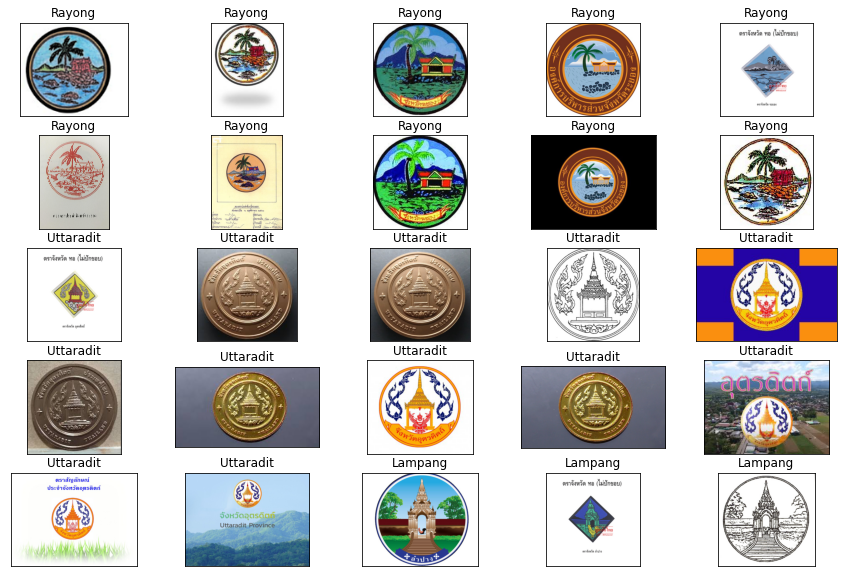

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(dataframe.images[i]))
    ax.set_title(dataframe.labels[i])
plt.show()

In [10]:
shuffled_dataframe = dataframe.sample(frac = 1)

In [11]:
all_train, test = train_test_split(shuffled_dataframe, test_size=0.2, random_state=0)
train, val = train_test_split(all_train, test_size=0.3, random_state=0)

In [12]:
test.head()

,images,labels
1832,/Users/kamonwantawong/Downloads/data/Phuket/lo...,Phuket
38,/Users/kamonwantawong/Downloads/data/Kanchanab...,Kanchanaburi
1962,/Users/kamonwantawong/Downloads/data/Songkhla/...,Songkhla
1727,/Users/kamonwantawong/Downloads/data/Nakhon Pa...,Nakhon Pathom
596,/Users/kamonwantawong/Downloads/data/Nong Bua ...,Nong Bua Lam Phu


In [13]:
training_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
training_generator = training_data_gen.flow_from_dataframe(dataframe=train,
                                                          x_col='images', y_col='labels',
                                                          target_size=(224, 224),
                                                          color_mode='rgba',
                                                          class_mode='categorical',
                                                          batch_size=64)

val_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
validation_generator = val_data_gen.flow_from_dataframe(dataframe=val,
                                                       x_col='images', y_col='labels',
                                                       target_size=(224, 224),
                                                       color_mode='rgba',
                                                       class_mode='categorical',
                                                       batch_size=64)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
test_generator = test_data_gen.flow_from_dataframe(dataframe=test,
                                                  x_col='images', y_col='labels',
                                                  target_size=(224, 224),
                                                  color_mode='rgba',
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  shuffle=False)

Found 1192 validated image filenames belonging to 77 classes.
Found 511 validated image filenames belonging to 77 classes.
Found 426 validated image filenames belonging to 77 classes.


In [14]:
label_map = test_generator.class_indices
label_map

{'Amnat Charoen': 0,
 'Ang Thong': 1,
 'Bangkok': 2,
 'Bueng Kan': 3,
 'Buri Ram': 4,
 'Chachoengsao': 5,
 'Chai Nat': 6,
 'Chaiyaphum': 7,
 'Chanthaburi': 8,
 'Chiang Mai': 9,
 'Chiang Rai': 10,
 'Chon Buri': 11,
 'Chumphon': 12,
 'Kalasin': 13,
 'Kamphaeng Phet': 14,
 'Kanchanaburi': 15,
 'Khon Kaen': 16,
 'Krabi': 17,
 'Lampang': 18,
 'Lamphun': 19,
 'Loei': 20,
 'Lop Buri': 21,
 'Mae Hong Son': 22,
 'Maha Sarakham': 23,
 'Mukdahan': 24,
 'Nakhon Nayok': 25,
 'Nakhon Pathom': 26,
 'Nakhon Phanom': 27,
 'Nakhon Ratchasima': 28,
 'Nakhon Sawan': 29,
 'Nakhon Si Thammarat': 30,
 'Nan': 31,
 'Narathiwat': 32,
 'Nong Bua Lam Phu': 33,
 'Nong Khai': 34,
 'Nonthaburi': 35,
 'Pathum Thani': 36,
 'Pattani': 37,
 'Phang Nga': 38,
 'Phatthalung': 39,
 'Phayao': 40,
 'Phetchabun': 41,
 'Phetchaburi': 42,
 'Phichit': 43,
 'Phitsanulok': 44,
 'Phra Nakhon Si Ayutthaya': 45,
 'Phrae': 46,
 'Phuket': 47,
 'Prachin Buri': 48,
 'Prachuap Khiri Khan': 49,
 'Ranong': 50,
 'Ratchaburi': 51,
 'Rayong': 5

In [15]:
test_generator.class_indices.keys()

dict_keys(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram', 'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi', 'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin', 'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang', 'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham', 'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom', 'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan', 'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi', 'Pathum Thani', 'Pattani', 'Phang Nga', 'Phatthalung', 'Phayao', 'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok', 'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri', 'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et', 'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon', 'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri', 'Songkhla', 'Sukhothai', 'Suphan Buri', 'Surat Thani', 'Surin', 'Tak', 'Trang', 'Trat', 'Ubon Ratchathani'

Import Model and Finetuning

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 4), padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(77, activation=tf.nn.softmax)
])

In [17]:
for layer in model.layers:
    layer.trainable = False
    
from tensorflow.keras import layers 
from tensorflow.keras import Model 

In [18]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(77, activation='softmax')(x)

model = tf.keras.models.Model(model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
#model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      1184      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 100352)            0     

In [21]:
history = model.fit(training_generator,epochs=50,
                              validation_data=validation_generator,
                                )

Epoch 1/50
19/19 [==============================] - 26s 1s/step - loss: 4.3438 - acc: 0.0117 - val_loss: 4.3436 - val_acc: 0.0137
Epoch 2/50
19/19 [==============================] - 22s 1s/step - loss: 4.3429 - acc: 0.0176 - val_loss: 4.3434 - val_acc: 0.0137
Epoch 3/50
19/19 [==============================] - 24s 1s/step - loss: 4.3424 - acc: 0.0159 - val_loss: 4.3431 - val_acc: 0.0137
Epoch 4/50
19/19 [==============================] - 30s 2s/step - loss: 4.3422 - acc: 0.0159 - val_loss: 4.3428 - val_acc: 0.0137
Epoch 5/50
19/19 [==============================] - 26s 1s/step - loss: 4.3410 - acc: 0.0218 - val_loss: 4.3425 - val_acc: 0.0137
Epoch 6/50
19/19 [==============================] - 25s 1s/step - loss: 4.3406 - acc: 0.0193 - val_loss: 4.3422 - val_acc: 0.0137
Epoch 7/50
19/19 [==============================] - 28s 1s/step - loss: 4.3405 - acc: 0.0201 - val_loss: 4.3419 - val_acc: 0.0137
Epoch 8/50
19/19 [==============================] - 26s 1s/step - loss: 4.3396 - acc: 0.01

history = model.fit(training_generator, batch_size = 32, epochs = 20, validation_data=validation_generator)

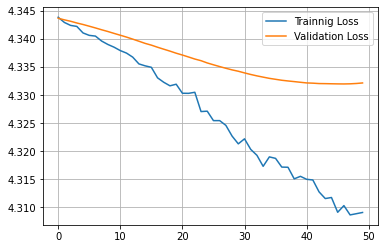

In [22]:
model_train_loss = history.history['loss']
model_val_loss = history.history['val_loss']

plt.plot(history.epoch, model_train_loss, label='Trainnig Loss')
plt.plot(history.epoch, model_val_loss, label='Validation Loss')
plt.grid(True)
plt.legend()

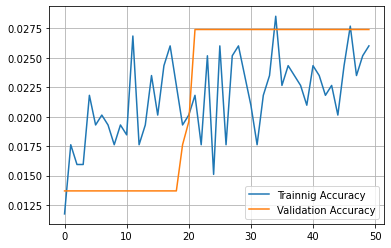

In [23]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(history.epoch, train_acc, label='Trainnig Accuracy')
plt.plot(history.epoch, val_acc, label='Validation Accuracy')
plt.grid(True)
plt.legend()

In [24]:
model.evaluate(test_generator)

7/7 [==============================] - 8s 1s/step - loss: 4.3482 - acc: 0.0094


[4.3481550216674805, 0.009389671497046947]

In [25]:
# Switch Dict and Value
label_map_switch = {}
for k, v in label_map.items():
    label_map_switch[v] = k
label_map_switch

{0: 'Amnat Charoen',
 1: 'Ang Thong',
 2: 'Bangkok',
 3: 'Bueng Kan',
 4: 'Buri Ram',
 5: 'Chachoengsao',
 6: 'Chai Nat',
 7: 'Chaiyaphum',
 8: 'Chanthaburi',
 9: 'Chiang Mai',
 10: 'Chiang Rai',
 11: 'Chon Buri',
 12: 'Chumphon',
 13: 'Kalasin',
 14: 'Kamphaeng Phet',
 15: 'Kanchanaburi',
 16: 'Khon Kaen',
 17: 'Krabi',
 18: 'Lampang',
 19: 'Lamphun',
 20: 'Loei',
 21: 'Lop Buri',
 22: 'Mae Hong Son',
 23: 'Maha Sarakham',
 24: 'Mukdahan',
 25: 'Nakhon Nayok',
 26: 'Nakhon Pathom',
 27: 'Nakhon Phanom',
 28: 'Nakhon Ratchasima',
 29: 'Nakhon Sawan',
 30: 'Nakhon Si Thammarat',
 31: 'Nan',
 32: 'Narathiwat',
 33: 'Nong Bua Lam Phu',
 34: 'Nong Khai',
 35: 'Nonthaburi',
 36: 'Pathum Thani',
 37: 'Pattani',
 38: 'Phang Nga',
 39: 'Phatthalung',
 40: 'Phayao',
 41: 'Phetchabun',
 42: 'Phetchaburi',
 43: 'Phichit',
 44: 'Phitsanulok',
 45: 'Phra Nakhon Si Ayutthaya',
 46: 'Phrae',
 47: 'Phuket',
 48: 'Prachin Buri',
 49: 'Prachuap Khiri Khan',
 50: 'Ranong',
 51: 'Ratchaburi',
 52: 'Rayong

In [26]:
predictions = model.predict(test_generator)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
predicted_label_batch =list(map(label_map_switch.get, pred_labels.tolist()))

7/7 [==============================] - 7s 956ms/step


In [27]:
test_dup = test.copy()
test_dup = test_dup.reset_index(drop=True)
test_dup["predict"] = pd.DataFrame(predicted_label_batch)
test_dup.head()

,images,labels,predict
0,/Users/kamonwantawong/Downloads/data/Phuket/lo...,Phuket,Nakhon Si Thammarat
1,/Users/kamonwantawong/Downloads/data/Kanchanab...,Kanchanaburi,Nakhon Si Thammarat
2,/Users/kamonwantawong/Downloads/data/Songkhla/...,Songkhla,Nakhon Si Thammarat
3,/Users/kamonwantawong/Downloads/data/Nakhon Pa...,Nakhon Pathom,Nakhon Si Thammarat
4,/Users/kamonwantawong/Downloads/data/Nong Bua ...,Nong Bua Lam Phu,Nakhon Si Thammarat


In [28]:
y_pred = [label_map_switch[k] for k in pred_labels]
print(classification_report(test.labels, y_pred))

                          precision    recall  f1-score   support

           Amnat Charoen       0.00      0.00      0.00         7
               Ang Thong       0.00      0.00      0.00         5
                 Bangkok       0.00      0.00      0.00         6
               Bueng Kan       0.00      0.00      0.00        10
                Buri Ram       0.00      0.00      0.00         5
            Chachoengsao       0.00      0.00      0.00         4
                Chai Nat       0.00      0.00      0.00         2
              Chaiyaphum       0.00      0.00      0.00         5
             Chanthaburi       0.00      0.00      0.00         3
              Chiang Mai       0.00      0.00      0.00         9
              Chiang Rai       0.00      0.00      0.00        14
               Chon Buri       0.00      0.00      0.00         3
                Chumphon       0.00      0.00      0.00         6
                 Kalasin       0.00      0.00      0.00         4
         

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


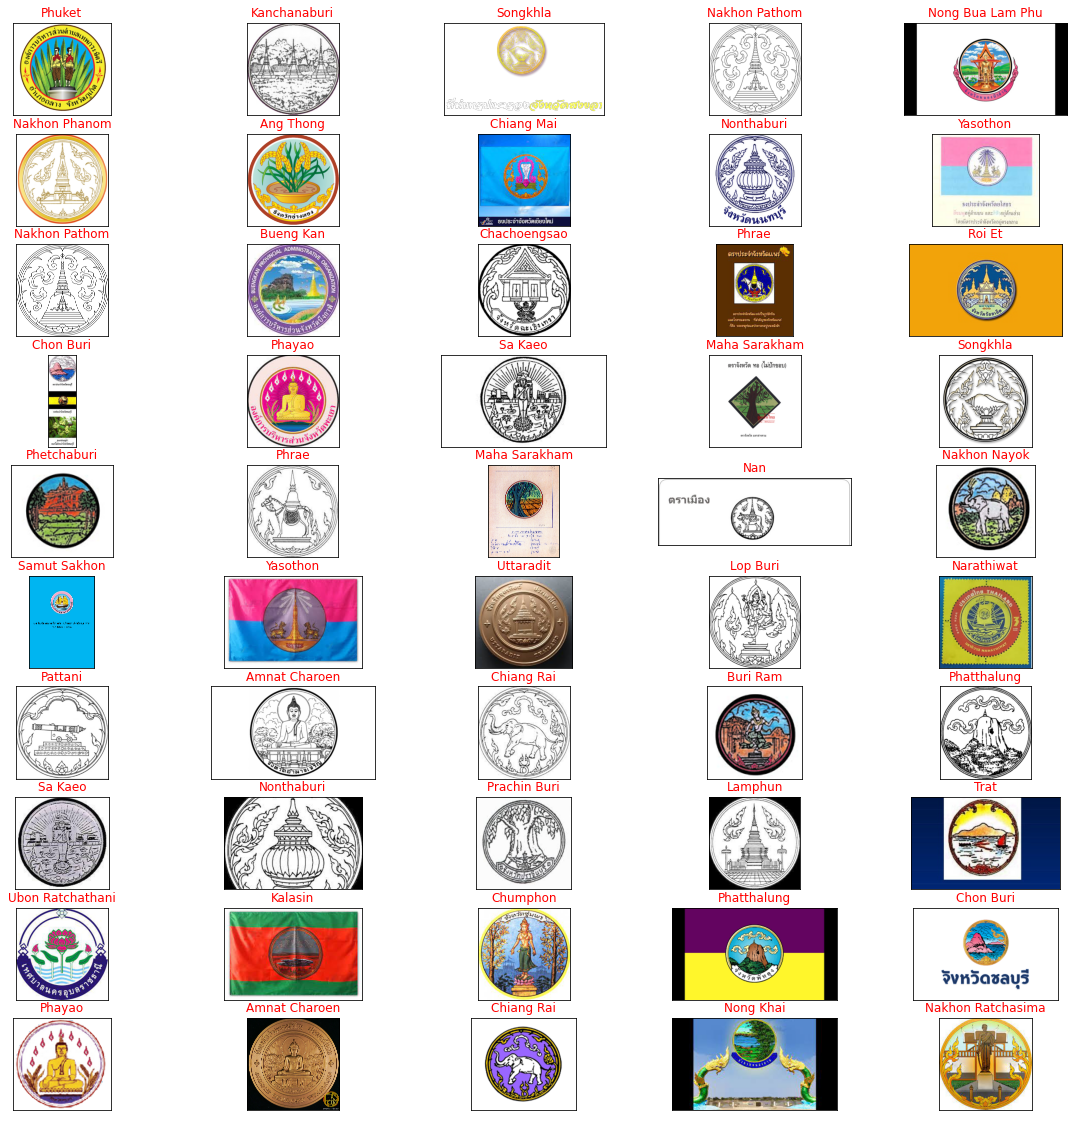

In [29]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_dup.images[i]))
    color = "green" if test_dup.predict[i] == test_dup.labels[i] else "red"
    ax.set_title(test_dup.labels[i],color=color)
plt.show()

Base Model

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 4), padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(77, activation=tf.nn.softmax)
])

In [31]:
for layer in model.layers:
    layer.trainable = True
    
from tensorflow.keras import layers 
from tensorflow.keras import Model 

In [32]:
y = layers.Flatten()(model.output)
y = layers.Dense(77, activation='softmax')(y)
base_model = tf.keras.models.Model(model.input, y)
base_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [33]:
basehist = base_model.fit(training_generator, validation_data = validation_generator, epochs = 50)

Epoch 1/50
19/19 [==============================] - 44s 2s/step - loss: 4.3461 - acc: 0.0084 - val_loss: 4.3486 - val_acc: 0.0098
Epoch 2/50
19/19 [==============================] - 54s 3s/step - loss: 4.3462 - acc: 0.0134 - val_loss: 4.3482 - val_acc: 0.0098
Epoch 3/50
19/19 [==============================] - 52s 3s/step - loss: 4.3442 - acc: 0.0151 - val_loss: 4.3478 - val_acc: 0.0254
Epoch 4/50
19/19 [==============================] - 44s 2s/step - loss: 4.3416 - acc: 0.0185 - val_loss: 4.3371 - val_acc: 0.0137
Epoch 5/50
19/19 [==============================] - 48s 2s/step - loss: 4.3358 - acc: 0.0218 - val_loss: 4.3333 - val_acc: 0.0215
Epoch 6/50
19/19 [==============================] - 50s 3s/step - loss: 4.3272 - acc: 0.0243 - val_loss: 4.3319 - val_acc: 0.0176
Epoch 7/50
19/19 [==============================] - 51s 3s/step - loss: 4.3231 - acc: 0.0218 - val_loss: 4.3304 - val_acc: 0.0117
Epoch 8/50
19/19 [==============================] - 42s 2s/step - loss: 4.3171 - acc: 0.02

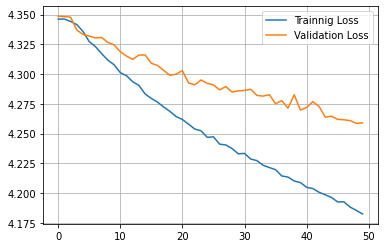

In [34]:
base_model_train_loss = basehist.history['loss']
base_model_val_loss = basehist.history['val_loss']

plt.plot(basehist.epoch, base_model_train_loss, label='Trainnig Loss')
plt.plot(basehist.epoch, base_model_val_loss, label='Validation Loss')
plt.grid(True)
plt.legend()

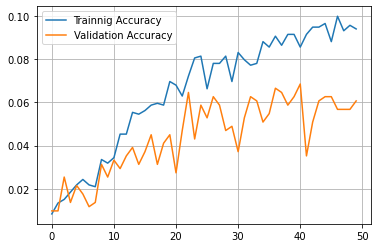

In [35]:
base_model_train_acc =basehist.history['acc']
base_model_val_acc = basehist.history['val_acc']

plt.plot(basehist.epoch, base_model_train_acc, label='Trainnig Accuracy')
plt.plot(basehist.epoch, base_model_val_acc, label='Validation Accuracy')
plt.grid(True)
plt.legend()

In [36]:
base_model.evaluate(test_generator)

7/7 [==============================] - 7s 917ms/step - loss: 4.2621 - acc: 0.0587


[4.262068748474121, 0.05868544429540634]

In [37]:
predictions2 = model.predict(test_generator)     # Vector of probabilities
pred_labels2 = np.argmax(predictions2, axis = 1) # We take the highest probability
predicted2_label_batch =list(map(label_map_switch.get, pred_labels2.tolist()))

7/7 [==============================] - 6s 848ms/step


In [38]:
test2_dup = test.copy()
test2_dup = test2_dup.reset_index(drop=True)
test2_dup["predict"] = pd.DataFrame(predicted2_label_batch)
test2_dup.head()

,images,labels,predict
0,/Users/kamonwantawong/Downloads/data/Phuket/lo...,Phuket,Phayao
1,/Users/kamonwantawong/Downloads/data/Kanchanab...,Kanchanaburi,Buri Ram
2,/Users/kamonwantawong/Downloads/data/Songkhla/...,Songkhla,Kalasin
3,/Users/kamonwantawong/Downloads/data/Nakhon Pa...,Nakhon Pathom,Buri Ram
4,/Users/kamonwantawong/Downloads/data/Nong Bua ...,Nong Bua Lam Phu,Phayao


In [39]:
y_pred2 = [label_map_switch[k] for k in pred_labels2]
print(classification_report(test.labels, y_pred2))

                          precision    recall  f1-score   support

           Amnat Charoen       0.00      0.00      0.00         7
               Ang Thong       0.00      0.00      0.00         5
                 Bangkok       0.00      0.00      0.00         6
               Bueng Kan       0.00      0.00      0.00        10
                Buri Ram       0.00      0.00      0.00         5
            Chachoengsao       0.00      0.00      0.00         4
                Chai Nat       0.00      0.00      0.00         2
              Chaiyaphum       0.00      0.00      0.00         5
             Chanthaburi       0.00      0.00      0.00         3
              Chiang Mai       0.00      0.00      0.00         9
              Chiang Rai       0.00      0.00      0.00        14
               Chon Buri       0.00      0.00      0.00         3
                Chumphon       0.00      0.00      0.00         6
                 Kalasin       0.02      0.50      0.04         4
         

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


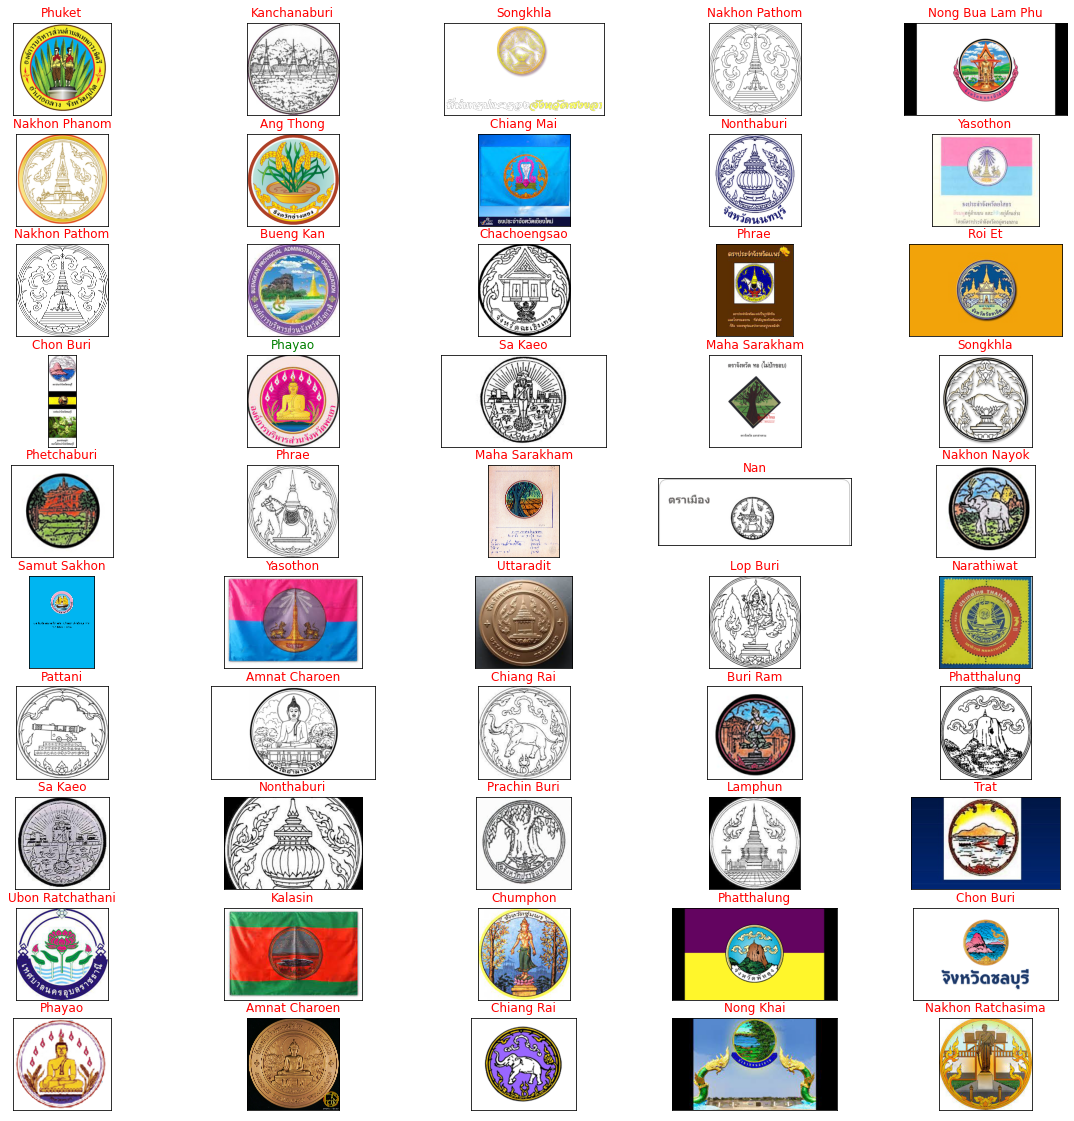

In [40]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20,20), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test2_dup.images[i]))
    color = "green" if test2_dup.predict[i] == test2_dup.labels[i] else "red"
    ax.set_title(test2_dup.labels[i],color=color)
plt.show()